1. Import libraries & Dataset

In [1]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#import order_products_customer pkl
df_ords_prods_custm = pd.read_pickle(r'/Users/samuelcallender/Documents/ Instacart Basket Analysis/02 Data/Prepared Data/orders_products_customers.pkl')



2. Address Data Security

In [3]:
df_ords_prods_custm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32406041 entries, 0 to 32406040
Data columns (total 34 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   Unnamed: 0.1            int64   
 1   Unnamed: 0              int64   
 2   order_id                int64   
 3   user_id                 object  
 4   eval_set                object  
 5   order_number            int64   
 6   order_day_of_week       int64   
 7   order_hour_of_day       int64   
 8   days_since_prior_order  float64 
 9   product_id              int64   
 10  add_to_cart_order       int64   
 11  reordered               int64   
 12  product_name            object  
 13  aisle_id                int64   
 14  department_id           int64   
 15  prices                  float64 
 16  _merge                  category
 17  price_range_loc         object  
 18  busiest_day             object  
 19  busiest_days            object  
 20  busiest_period_of_day   object  
 21  max_or

3. Create regional segmentation of the data

In [5]:
#create states within regions
region = []
for value in df_ords_prods_custm['state']:
    if (value == 'Maine') or (value == 'New Hampshire') or (value == 'Vermont') or (value == 'Massachusetts') or (value == 'Rhode Island') or (value == 'Connecticut') or (value == 'New York') or (value == 'Pennsylvania') or (value =='New Jersey'):
        region.append('Northeast')
    elif (value == 'Wisconsin') or (value == 'Michigan') or (value == 'Illinois') or (value == 'Indiana') or (value == 'Ohio') or (value == 'North Dakota') or (value == 'South Dakota') or (value == 'Nebraska') or (value == 'Kansas') or (value == 'Minnesota') or (value == 'Iowa') or (value == 'Missouri'):
        region.append('Midwest')
    elif (value == 'Idaho') or (value == 'Montana') or (value == 'Wyoming') or (value == 'Nevada') or (value == 'Utah') or (value == 'Colorado') or (value == 'Arizona') or (value == 'New Mexico') or (value == 'Alaska') or (value == 'Washington') or (value == 'Oregon') or (value == 'California') or (value == 'Hawaii'):
        region.append('West')
    else:
        region.append('South')

In [6]:
#create the region column
df_ords_prods_custm['region'] = region

In [7]:
df_ords_prods_custm['region'].value_counts(dropna = False)

South        10792300
West          8293217
Midwest       7597585
Northeast     5722939
Name: region, dtype: int64

In [8]:
region_spend = pd.crosstab(df_ords_prods_custm['region'],df_ords_prods_custm['spending_flag'],dropna = False)

In [9]:
region_spend.to_clipboard()

In [10]:
region_spend

spending_flag,High spender,Low spender
region,,
Midwest,156158,7441427
Northeast,108246,5614693
South,210019,10582281
West,160478,8132739


4. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [11]:
df_ords_prods_custm.loc[df_ords_prods_custm['max_order'] < 5, 'low_order_flag'] = 'Low order customer'

In [12]:
df_ords_prods_custm.loc[df_ords_prods_custm['max_order'] >= 5, 'low_order_flag'] = 'High order customer'

In [13]:
df_ords_prods_custm['low_order_flag'].value_counts(dropna = False)

High order customer    30965686
Low order customer      1440355
Name: low_order_flag, dtype: int64

In [14]:
#create high order customer subset
df_high_order_customers = df_ords_prods_custm[df_ords_prods_custm['low_order_flag'] == 'High order customer']

In [15]:
#export high order customers 
df_high_order_customers.to_pickle(r'/Users/samuelcallender/Documents/ Instacart Basket Analysis/02 Data/Prepared Data/high_order_customers.pkl')

5. Customer Profiles

In [16]:
df_ords_prods_custm.describe()

,Unnamed: 0.1,Unnamed: 0,order_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,average_price,median_prior_orders,age,number_dependants,income
count,3.240604e+07,3.240604e+07,3.240604e+07,3.240604e+07,3.240604e+07,3.240604e+07,3.032984e+07,3.240604e+07,3.240604e+07,3.240604e+07,3.240604e+07,3.240604e+07,3.240604e+07,3.240604e+07,3.240604e+07,3.240604e+07,3.240604e+07,3.240604e+07,3.240604e+07
mean,1.709855e+06,1.709855e+06,1.710745e+06,1.714223e+01,2.738862e+00,1.342515e+01,1.110410e+01,2.559895e+04,8.352616e+00,5.895845e-01,7.119773e+01,9.919923e+00,1.198004e+01,3.305203e+01,1.198004e+01,1.039789e+01,4.946525e+01,1.501891e+00,9.943761e+04
std,9.864573e+05,9.864573e+05,9.872986e+05,1.753527e+01,2.090074e+00,4.246382e+00,8.779062e+00,1.408389e+04,7.127128e+00,4.919092e-01,3.821182e+01,6.281418e+00,4.956464e+02,2.515518e+01,8.324039e+01,7.131767e+00,1.848557e+01,1.118866e+00,4.305710e+04
min,0.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,2.590300e+04
25%,8.556360e+05,8.556360e+05,8.559480e+05,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,1.354400e+04,3.000000e+00,0.000000e+00,3.100000e+01,4.000000e+00,4.200000e+00,1.300000e+01,7.390000e+00,6.000000e+00,3.300000e+01,1.000000e+00,6.700200e+04
50%,1.709171e+06,1.709171e+06,1.711050e+06,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00,2.530500e+04,6.000000e+00,1.000000e+00,8.300000e+01,9.000000e+00,7.400000e+00,2.600000e+01,7.820000e+00,8.000000e+00,4.900000e+01,2.000000e+00,9.661700e+04
75%,2.565906e+06,2.565906e+06,2.565497e+06,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01,3.794700e+04,1.100000e+01,1.000000e+00,1.070000e+02,1.600000e+01,1.130000e+01,4.700000e+01,8.250000e+00,1.300000e+01,6.500000e+01,3.000000e+00,1.279120e+05
max,3.421081e+06,3.421081e+06,3.421083e+06,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,4.968800e+04,1.450000e+02,1.000000e+00,1.340000e+02,2.100000e+01,9.999900e+04,9.900000e+01,2.500542e+04,3.000000e+01,8.100000e+01,3.000000e+00,5.939010e+05


Profiles of Age

In [17]:
df_ords_prods_custm.loc[(df_ords_prods_custm['age'] <= 40), 'age_profile'] = '18-40'
df_ords_prods_custm.loc[(df_ords_prods_custm['age'] > 40) & (df_ords_prods_custm['age'] <= 65), 'age_profile'] = '41-65'
df_ords_prods_custm.loc[(df_ords_prods_custm['age'] > 65), 'age_profile'] = '65+'
df_ords_prods_custm['age_profile'].value_counts(dropna = False)

41-65    12647219
18-40    11670466
65+       8088356
Name: age_profile, dtype: int64

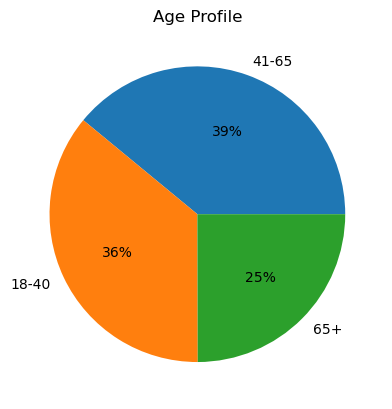

In [18]:
#age pie chart
age_profile_pie = df_ords_prods_custm['age_profile'].value_counts().plot.pie(title ='Age Profile', label = '', autopct=('%1.f%%'))

In [19]:
#Age statistics
age_sums = df_ords_prods_custm.groupby(['age_profile']).agg({'days_since_prior_order' : ['min', 'max', 'mean'], 'prices' : ['min', 'max', 'mean', 'sum']})
age_sums

days_since_prior_order                  prices           \
                               min   max       mean    min      max   
age_profile                                                           
18-40                          0.0  30.0  11.109811    1.0  99999.0   
41-65                          0.0  30.0  11.113635    1.0  99999.0   
65+                            0.0  30.0  11.080953    1.0  99999.0   

                                     
                  mean          sum  
age_profile                          
18-40        12.084851  141035848.0  
41-65        11.973952  151437189.4  
65+          11.838332   95752641.6

Customers in all age profiles have roughly 11 days in between their orders.

In [20]:
#crosstab between ages and regions
crosstab_region_age = pd.crosstab(df_ords_prods_custm['region'], df_ords_prods_custm['age_profile'], dropna = False)

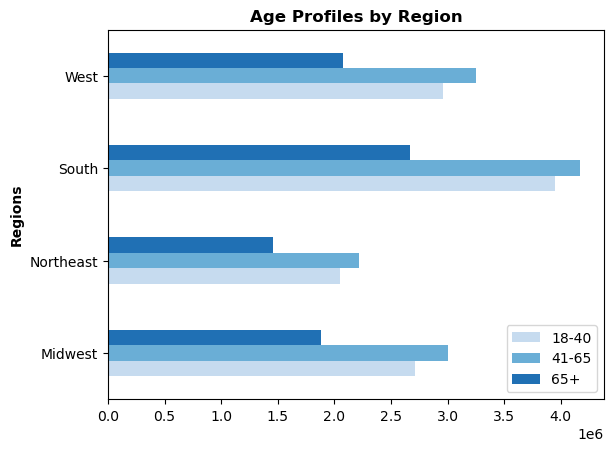

In [24]:
#create a stacked bar chart
region_age = crosstab_region_age.plot(kind = 'barh', color = sns.color_palette('Blues', 3))
plt.legend(loc='lower right')
plt.ylabel('Regions', fontweight = 'bold')
plt.title('Age Profiles by Region', fontweight = 'bold')
plt.show()

In [25]:
#import department dataframe
df_dep_t_new = pd.read_csv(r'/Users/samuelcallender/Documents/ Instacart Basket Analysis/02 Data/Prepared Data/departments_wrangled.csv')

In [26]:
df_dep_t_new.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)
df_dep_t_new

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [27]:
#merge departments dataframe with df_ords_prods_custm dataframe
df_all = df_ords_prods_custm.merge(df_dep_t_new, on = 'department_id')

In [28]:
df_all.head()

,Unnamed: 0.1,Unnamed: 0,order_id,user_id,eval_set,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,...,state,age,date_joined,number_dependants,family_status,income,region,low_order_flag,age_profile,department
0,0,0,2539329,1,prior,1,2,8,NaN,196,...,Alabama,31,2/17/2019,3,married,40423,South,High order customer,18-40,beverages
1,1,1,2398795,1,prior,2,3,7,15.0,196,...,Alabama,31,2/17/2019,3,married,40423,South,High order customer,18-40,beverages
2,2,2,473747,1,prior,3,3,12,21.0,196,...,Alabama,31,2/17/2019,3,married,40423,South,High order customer,18-40,beverages
3,3,3,2254736,1,prior,4,4,7,29.0,196,...,Alabama,31,2/17/2019,3,married,40423,South,High order customer,18-40,beverages
4,4,4,431534,1,prior,5,4,15,28.0,196,...,Alabama,31,2/17/2019,3,married,40423,South,High order customer,18-40,beverages


In [29]:
#create crosstab of age and department
crosstab_dept_age = pd.crosstab(df_all['department'], df_all['age_profile'], dropna = False)

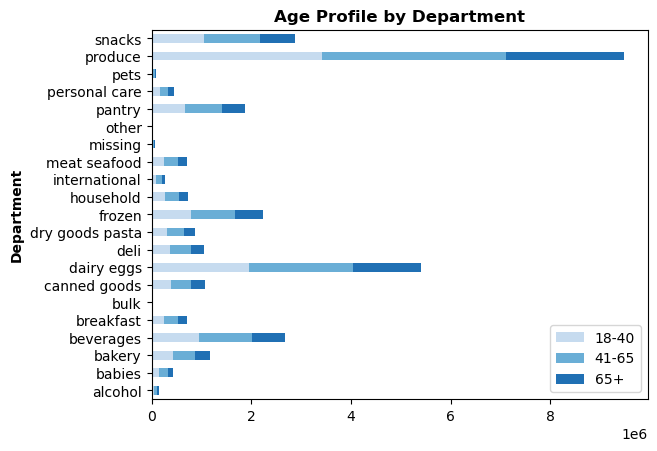

In [30]:
#stacked bar chart of age group and department
dept_age = crosstab_dept_age.plot(kind = 'barh', stacked = True, color = sns.color_palette('Blues', 3))
plt.legend(loc='lower right')
plt.ylabel('Department', fontweight = 'bold')
plt.title('Age Profile by Department', fontweight = 'bold')
plt.show()

Produce, dairy, and snacks are the top three departments across all age groups. 

Income Profiles

In [31]:
df_all.loc[(df_all['income'] <= 50000), 'income_profile'] = '<=50k'
df_all.loc[(df_all['income'] > 50000) & (df_all['income'] <= 150000), 'income_profile'] = '50k - 150k'
df_all.loc[(df_all['income'] > 150000), 'income_profile'] = '150k+'
df_all['income_profile'].value_counts(dropna = False)

50k - 150k    24760846
150k+          4050974
<=50k          3594221
Name: income_profile, dtype: int64

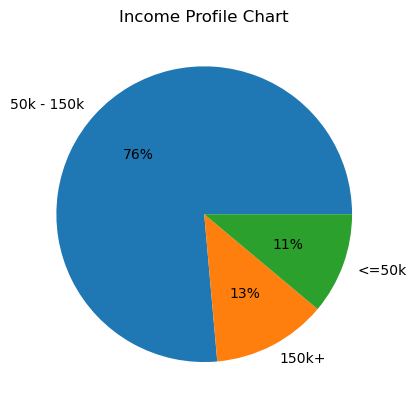

In [33]:
#income profile pie chart
income_profile_pie = df_all['income_profile'].value_counts().plot.pie(title ='Income Profile Chart', label = '', autopct=('%1.f%%'))

Customers in the 50k-150k income group represent the majority.

In [34]:
#income statistics
income_sums = df_all.groupby(['income_profile']).agg({'days_since_prior_order' : ['min', 'max', 'mean'], 'prices' : ['min', 'max', 'mean', 'sum']})
income_sums

days_since_prior_order                  prices           \
                                  min   max       mean    min      max   
income_profile                                                           
150k+                             0.0  30.0  10.941426    1.0  99999.0   
50k - 150k                        0.0  30.0  11.061366    1.0  99999.0   
<=50k                             0.0  30.0  11.587215    1.0     25.0   

                                        
                     mean          sum  
income_profile                          
150k+           32.893657  133251350.5  
50k - 150k       9.325363  230903881.2  
<=50k            6.696986   24070447.3

Main takeaway is that customers from the 50k-150k income profile represent the highest revenue for Instacart.

In [35]:
#create crosstab of regions and income grouos
crosstab_region_income = pd.crosstab(df_all['region'], df_all['income_profile'], dropna = False)

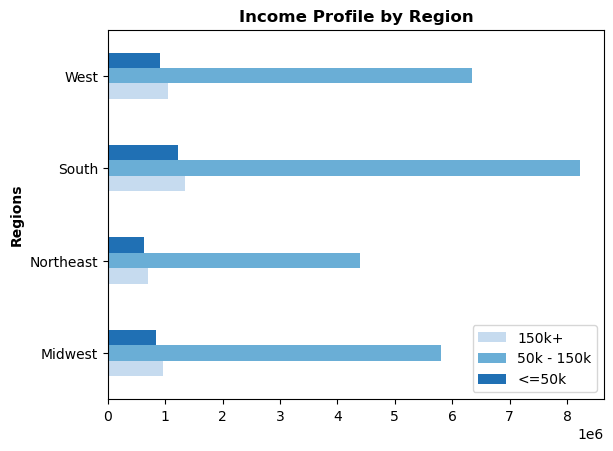

In [36]:
#bar chart of the regions broken down by income groups
region_income = crosstab_region_income.plot(kind = 'barh', color = sns.color_palette('Blues', 3))
plt.legend(loc='lower right')
plt.ylabel('Regions', fontweight = 'bold')
plt.title('Income Profile by Region', fontweight = 'bold')
plt.show()

In [37]:
#create a crosstab of department and income groups
crosstab_dept_income = pd.crosstab(df_all['department'], df_all['income_profile'], dropna = False)

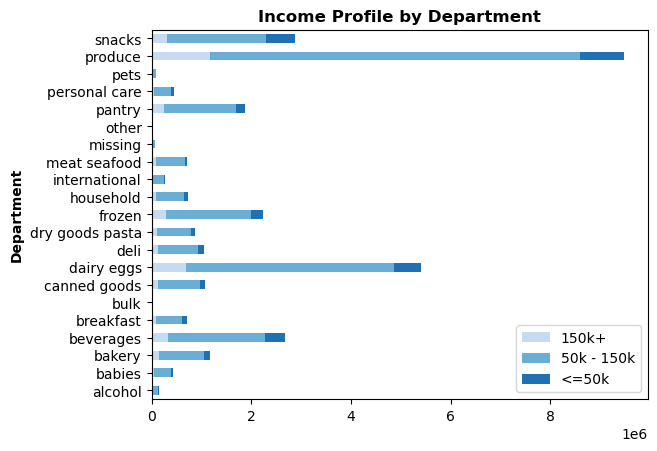

In [38]:
#stacked bar chart of department broken down by income group
dept_income = crosstab_dept_income.plot(kind = 'barh', stacked = True, color = sns.color_palette('Blues', 3))
plt.legend(loc='lower right')
plt.ylabel('Department', fontweight = 'bold')
plt.title('Income Profile by Department', fontweight = 'bold')
plt.show()

Produce and dairy are the top two departments across the income profiles.

Family Status Profiles

In [40]:
df_all.loc[(df_all['number_dependants'] == 0), 'family_profile'] = 'Single Adult'
df_all.loc[(df_all['number_dependants'] != 0), 'family_profile'] = 'Family'
df_all['family_profile'].value_counts(dropna = False)

Family          24308182
Single Adult     8097859
Name: family_profile, dtype: int64

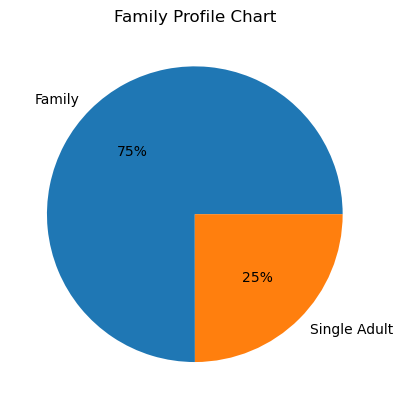

In [41]:
#Family status pie chart
family_profile_pie = df_all['family_profile'].value_counts().plot.pie(title = 'Family Profile Chart', label = '', autopct = ('%1.f%%'))

Customers with families represent the highest proportion of customers.

In [42]:
#family status statistics
family_sums = df_all.groupby(['family_profile']).agg({'days_since_prior_order' : ['min', 'max', 'mean'], 'prices' : ['min', 'max', 'mean', 'sum']})
family_sums

days_since_prior_order                  prices           \
                                  min   max       mean    min      max   
family_profile                                                           
Family                            0.0  30.0  11.111857    1.0  99999.0   
Single Adult                      0.0  30.0  11.080822    1.0  99999.0   

                                        
                     mean          sum  
family_profile                          
Family          11.930410  290006572.0  
Single Adult    12.129022   98219107.0

Customers with families represent the highest revenue for Instacart. Again, the days since the last order is 11. 

In [43]:
#Crosstab of families and regions
crosstab_region_family = pd.crosstab(df_all['region'], df_all['family_profile'], dropna = False)

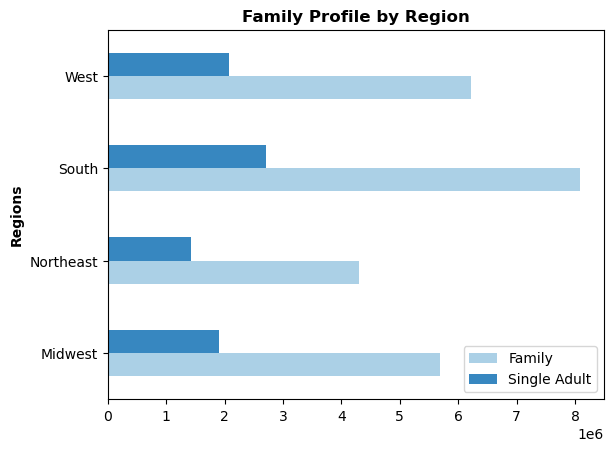

In [44]:
#Stacked bar chart of family groups across the regions
region_family = crosstab_region_family.plot(kind = 'barh', color = sns.color_palette('Blues', 2))
plt.legend(loc='lower right')
plt.ylabel('Regions', fontweight = 'bold')
plt.title('Family Profile by Region', fontweight = 'bold')
plt.show()

The south regions has the highest number of customers in the family profile.

In [45]:
#crosstab of family profile and department
crosstab_dept_family = pd.crosstab(df_all['department'], df_all['family_profile'], dropna = False)

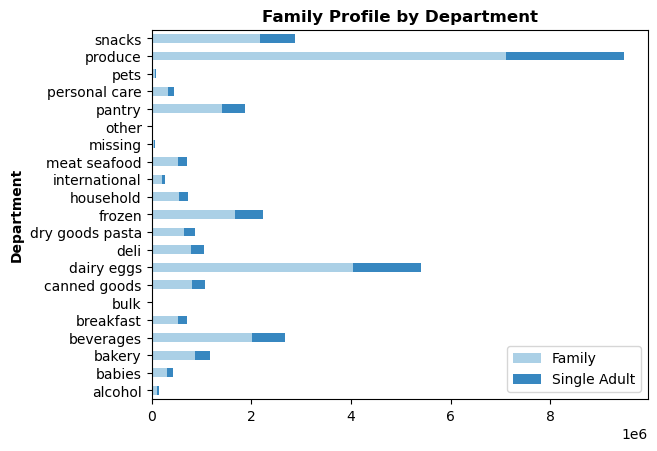

In [46]:
#stacked bar chart of family profiles by department
dept_family = crosstab_dept_family.plot(kind = 'barh', stacked = True, color = sns.color_palette('Blues', 2))
plt.legend(loc='lower right')
plt.ylabel('Department', fontweight = 'bold')
plt.title('Family Profile by Department', fontweight = 'bold')
plt.show()

Customers with families represents the most purchases in the produce and dairy departments.

Profiling orders from each day of the week

In [47]:
df_all['order_day_of_week'].value_counts(dropna = False)

0    6204404
1    5660456
6    4496635
2    4213986
5    4205906
3    3840701
4    3783953
Name: order_day_of_week, dtype: int64

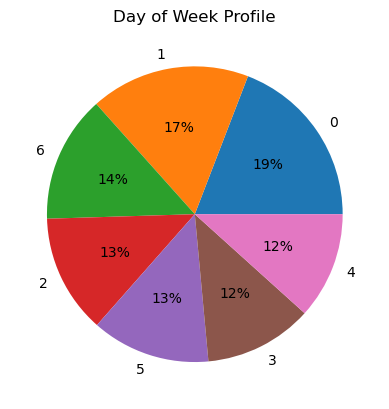

In [48]:
#Pie chart of orders for each day of the week
day_of_week_pie = df_all['order_day_of_week'].value_counts().plot.pie(title = 'Day of Week Profile', label = '', autopct = ('%1.f%%'))

Saturday, or 0, the the day of the week with the highest orders.

In [49]:
#statistics of the day of the week orders profil
day_of_week_sums = df_all.groupby(['order_day_of_week']).agg({'days_since_prior_order' : ['min', 'max', 'mean'], 'prices' : ['min', 'max', 'mean', 'sum']})
day_of_week_sums

days_since_prior_order                  prices           \
                                     min   max       mean    min      max   
order_day_of_week                                                           
0                                    0.0  30.0  11.614897    1.0  99999.0   
1                                    0.0  30.0  11.298707    1.0  99999.0   
2                                    0.0  30.0  11.282342    1.0  99999.0   
3                                    0.0  30.0  10.874996    1.0  99999.0   
4                                    0.0  30.0  10.547674    1.0  99999.0   
5                                    0.0  30.0  10.452171    1.0  99999.0   
6                                    0.0  30.0  11.269142    1.0  99999.0   

                                          
                        mean         sum  
order_day_of_week                         
0                  11.166830  69283522.8  
1                  12.181130  68950753.1  
2                  12.356068  52068295.8  
3                  12.234838  46990355.6  
4                  12.169734  46049701.8  
5                  12.883977  54188796.1  
6                  11.273820  50694253.8

Saturday represents the day with the highest revenue, which aligns with the highest orders also. 

In [50]:
#crosstab of day of the week orders and regions
crosstab_region_day_of_week = pd.crosstab(df_all['region'], df_all['order_day_of_week'], dropna = False)

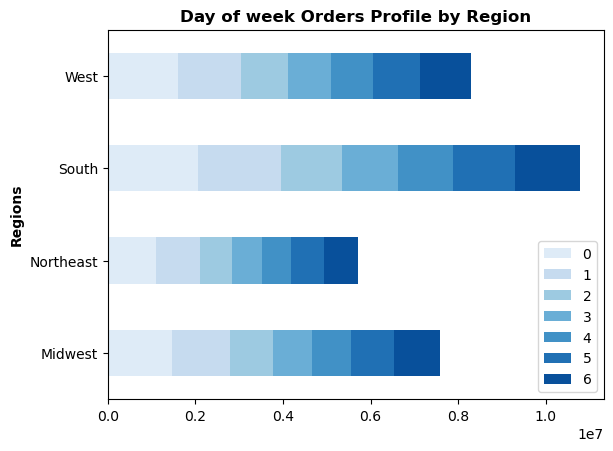

In [51]:
#stacked bar chart of day of the week orders broken down by regions
region_day_of_week = crosstab_region_day_of_week.plot(kind = 'barh', stacked = True, color = sns.color_palette('Blues', 7))
plt.legend(loc='lower right')
plt.ylabel('Regions', fontweight = 'bold')
plt.title('Day of week Orders Profile by Region', fontweight = 'bold')
plt.show()

Saturday in the south represents the highest, which makes sense as the south also represents the most families.

In [52]:
#crosstab of orders day of the week and departments
crosstab_dept_day_of_week = pd.crosstab(df_all['department'], df_all['order_day_of_week'], dropna = False)

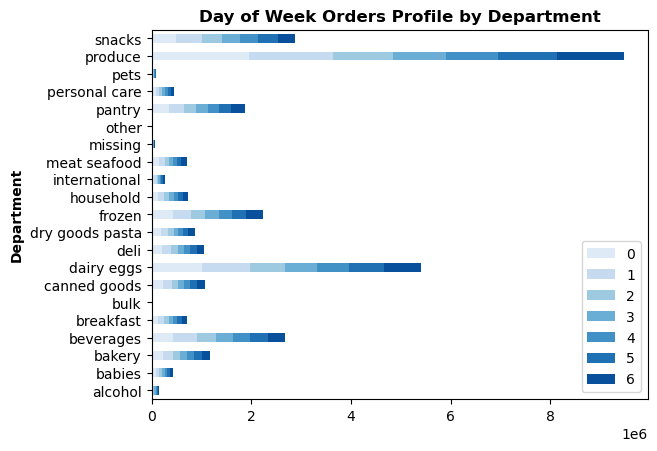

In [53]:
#stacked bar chart of orders day of the week broken down by department
dept_day_of_week = crosstab_dept_day_of_week.plot(kind = 'barh', stacked = True, color = sns.color_palette('Blues', 7))
plt.legend(loc='lower right')
plt.ylabel('Department', fontweight = 'bold')
plt.title('Day of Week Orders Profile by Department', fontweight = 'bold')
plt.show()

The produce department is the leading department where customers make their purchases and on Satuday. 

Export Visualizations

In [54]:
df_all.shape

(32406041, 40)

In [55]:
df_all.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'order_id', 'user_id', 'eval_set',
       'order_number', 'order_day_of_week', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'add_to_cart_order',
       'reordered', 'product_name', 'aisle_id', 'department_id', 'prices',
       '_merge', 'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'average_price',
       'spending_flag', 'median_prior_orders', 'order_frequency_flag',
       'gender', 'state', 'age', 'date_joined', 'number_dependants',
       'family_status', 'income', 'region', 'low_order_flag', 'age_profile',
       'department', 'income_profile', 'family_profile'],
      dtype='object')

In [56]:
#remove un-needed columns
df_all = df_all.drop(columns = ['Unnamed: 0.1', 'Unnamed: 0', 'aisle_id'])

In [57]:
df_all.shape

(32406041, 37)

In [58]:
df_all.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'department_id',
       'prices', '_merge', 'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'average_price',
       'spending_flag', 'median_prior_orders', 'order_frequency_flag',
       'gender', 'state', 'age', 'date_joined', 'number_dependants',
       'family_status', 'income', 'region', 'low_order_flag', 'age_profile',
       'department', 'income_profile', 'family_profile'],
      dtype='object')

In [59]:
#export visualizations
age_profile_pie.figure.savefig(r'/Users/samuelcallender/Documents/ Instacart Basket Analysis/04 Analysis/Visualizations/age_profile_pie.png')

In [60]:
region_age.figure.savefig(r'/Users/samuelcallender/Documents/ Instacart Basket Analysis/04 Analysis/Visualizations/region_age.png')

In [61]:
dept_age.figure.savefig(r'/Users/samuelcallender/Documents/ Instacart Basket Analysis/04 Analysis/Visualizations/dept_age.png')

In [62]:
income_profile_pie.figure.savefig(r'/Users/samuelcallender/Documents/ Instacart Basket Analysis/04 Analysis/Visualizations/income_profile_pie.png')

In [63]:
region_income.figure.savefig(r'/Users/samuelcallender/Documents/ Instacart Basket Analysis/04 Analysis/Visualizations/region_income.png')

In [64]:
dept_income.figure.savefig(r'/Users/samuelcallender/Documents/ Instacart Basket Analysis/04 Analysis/Visualizations/dept_income.png')

In [65]:
family_profile_pie.figure.savefig(r'/Users/samuelcallender/Documents/ Instacart Basket Analysis/04 Analysis/Visualizations/family_profile_pie.png')

In [66]:
region_family.figure.savefig(r'/Users/samuelcallender/Documents/ Instacart Basket Analysis/04 Analysis/Visualizations/region_family.png')

In [67]:
dept_family.figure.savefig(r'/Users/samuelcallender/Documents/ Instacart Basket Analysis/04 Analysis/Visualizations/dept_family.png')

In [68]:
day_of_week_pie.figure.savefig(r'/Users/samuelcallender/Documents/ Instacart Basket Analysis/04 Analysis/Visualizations/day_of_week_pie.png')

In [69]:
region_day_of_week.figure.savefig(r'/Users/samuelcallender/Documents/ Instacart Basket Analysis/04 Analysis/Visualizations/region_day_of_week.png')

In [71]:
dept_day_of_week.figure.savefig(r'/Users/samuelcallender/Documents/ Instacart Basket Analysis/04 Analysis/Visualizations/dept_day_of_week.png')

In [73]:
#export final dataset
df_all.to_pickle(r'/Users/samuelcallender/Documents/ Instacart Basket Analysis/02 Data/Prepared Data/final_dataset.pkl')